In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Task 1: SVM

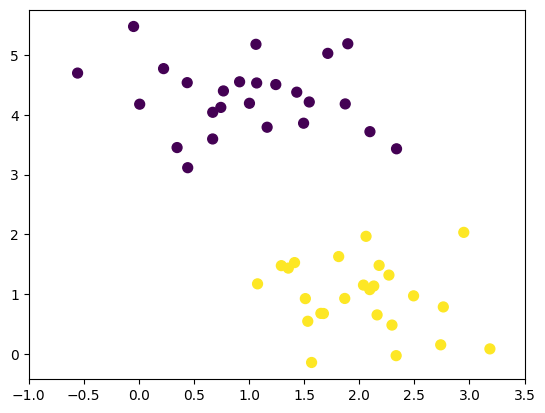

In [2]:
#pip install scikit-learn
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
#Which one is the data and which one is the label?

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlim(-1, 3.5)

In [7]:
from sklearn.svm import SVC #support vector machine

svm = SVC(kernel='linear',verbose=1) 
svm.fit(X,y)

[LibSVM]

SVC(kernel='linear', verbose=1)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


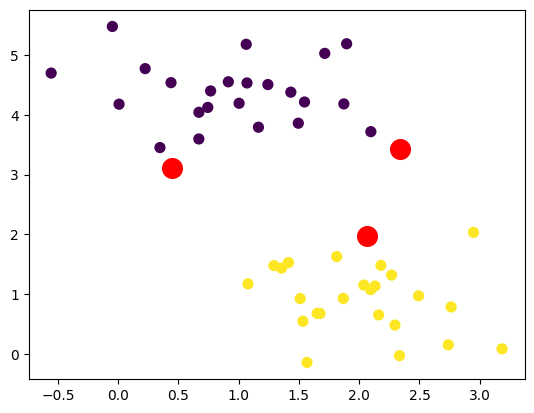

In [20]:
#Visualising support vectors
print(svm.support_vectors_)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=200, facecolors='red')

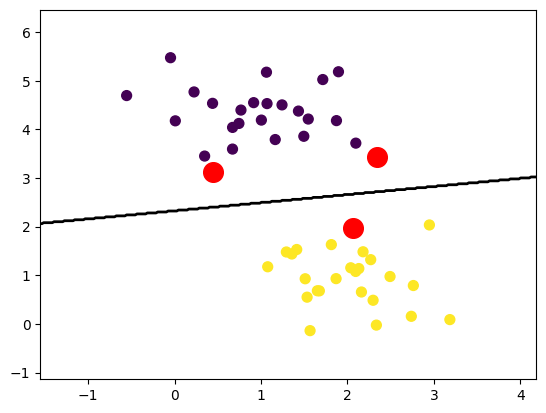

In [23]:
#Plot the decision boundary in some meaningful way, i.e., the separating hyperplane between the support vectors
def plot_decision_boundary(data, model): #Optional
    # Create a mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=200, facecolors='red')

    # Use the SVM model to predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plot_decision_boundary(X, svm)

# Task 2: Perceptron

In [27]:
from sklearn.linear_model import Perceptron 
#Making a perceptron classifier 
perceptron = Perceptron(max_iter=100, random_state=42, verbose=1) 
perceptron.fit(X, y)

-- Epoch 1
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 50, Avg. loss: 0.225467
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 100, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 150, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 250, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.32, NNZs: 2, Bias: 1.000000, T: 350, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(max_iter=100, random_state=42, verbose=1)

[[ 2.32736387 -2.36943449]] [1.]


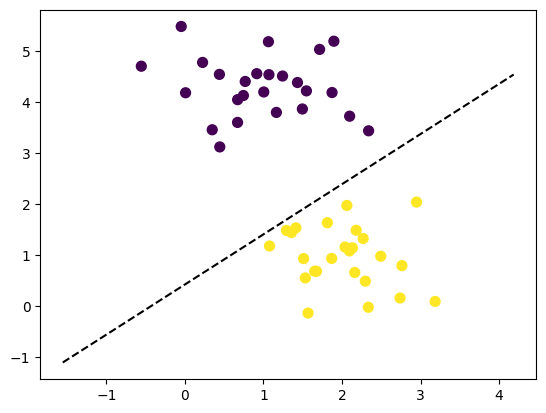

In [28]:
print(perceptron.coef_, perceptron.intercept_) #Decision boundary coefficients and bias
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# 计算决策边界
# 线的范围：从 x_min 到 x_max
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 决策边界的系数
w = perceptron.coef_[0]
b = perceptron.intercept_

# 根据 w 和 b 计算决策边界的两个端点
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] / w[1]) * x_values - b / w[1]

#plot decision boundary defined by coefficients and intercept
plt.plot(x_values, y_values, color='black', linestyle='--')


# Task 3: Perceptron Algorithm

In [58]:
def perceptron_algorithm(data, labels, max_iters):
    # initialise weights
    # weights_ = []#np.zeros(what should this shape be?)
    weights_ = np.zeros(shape=(data.shape[1]+1))
    
    for i in range(max_iters):
        errors_ = 0
        for x, label in zip(data, labels):
            # x = None#do you need to do anything to x? (is it the correct shape to multiple with weights?)
            # y = None#what is the prediction based on x and weights?
            x = np.insert(x, 0, 1)
            y = np.dot(weights_, x.transpose())
            # predicted = None#what can you tell from the value of y?
            predicted = 1 if y >= 0 else 0
            delta = label - predicted
            if delta:#Replace with misclassification condition
                errors_ = errors_ + 1
                # weights_ += []#perceptron update rule
                weights_ += delta * x
        
        print("iter:", i, "errors:", errors_) 
    return weights_
             
weights = perceptron_algorithm(X, y, 100) #Implement and uncomment
print(weights)

iter: 0 errors: 6
iter: 1 errors: 5
iter: 2 errors: 0
iter: 3 errors: 0
iter: 4 errors: 0
iter: 5 errors: 0
iter: 6 errors: 0
iter: 7 errors: 0
iter: 8 errors: 0
iter: 9 errors: 0
iter: 10 errors: 0
iter: 11 errors: 0
iter: 12 errors: 0
iter: 13 errors: 0
iter: 14 errors: 0
iter: 15 errors: 0
iter: 16 errors: 0
iter: 17 errors: 0
iter: 18 errors: 0
iter: 19 errors: 0
iter: 20 errors: 0
iter: 21 errors: 0
iter: 22 errors: 0
iter: 23 errors: 0
iter: 24 errors: 0
iter: 25 errors: 0
iter: 26 errors: 0
iter: 27 errors: 0
iter: 28 errors: 0
iter: 29 errors: 0
iter: 30 errors: 0
iter: 31 errors: 0
iter: 32 errors: 0
iter: 33 errors: 0
iter: 34 errors: 0
iter: 35 errors: 0
iter: 36 errors: 0
iter: 37 errors: 0
iter: 38 errors: 0
iter: 39 errors: 0
iter: 40 errors: 0
iter: 41 errors: 0
iter: 42 errors: 0
iter: 43 errors: 0
iter: 44 errors: 0
iter: 45 errors: 0
iter: 46 errors: 0
iter: 47 errors: 0
iter: 48 errors: 0
iter: 49 errors: 0
iter: 50 errors: 0
iter: 51 errors: 0
iter: 52 errors: 0
ite

# Task 4: 0/1 Digit Classification

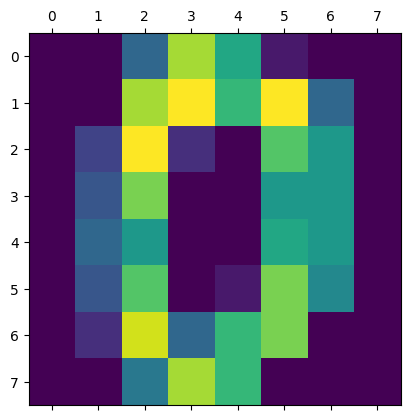

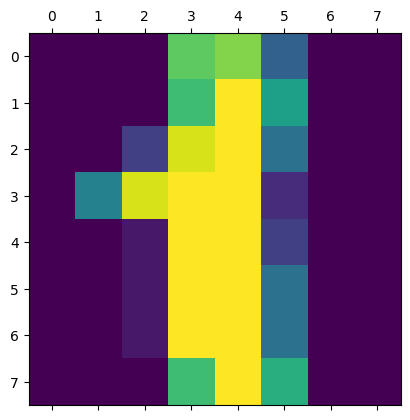

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits,labels = datasets.load_digits(return_X_y=True)
classes = [0,1] #Binary classification. Try changing these
only_keep_2_classes = np.isin(labels, classes)
X = digits[only_keep_2_classes]
y = labels[only_keep_2_classes]

def print_heatmap(data, l=8, h=8):
    plt.matshow(data.reshape(l,h))
    

print_heatmap(X[0])
print_heatmap(X[1])

## What do the weights mean?

In [65]:
weights  = perceptron_algorithm(X, y, 1000) #Run the perceptron classifier to distinguish 
print(weights)

iter: 0 errors: 6
iter: 1 errors: 5
iter: 2 errors: 0
iter: 3 errors: 0
iter: 4 errors: 0
iter: 5 errors: 0
iter: 6 errors: 0
iter: 7 errors: 0
iter: 8 errors: 0
iter: 9 errors: 0
iter: 10 errors: 0
iter: 11 errors: 0
iter: 12 errors: 0
iter: 13 errors: 0
iter: 14 errors: 0
iter: 15 errors: 0
iter: 16 errors: 0
iter: 17 errors: 0
iter: 18 errors: 0
iter: 19 errors: 0
iter: 20 errors: 0
iter: 21 errors: 0
iter: 22 errors: 0
iter: 23 errors: 0
iter: 24 errors: 0
iter: 25 errors: 0
iter: 26 errors: 0
iter: 27 errors: 0
iter: 28 errors: 0
iter: 29 errors: 0
iter: 30 errors: 0
iter: 31 errors: 0
iter: 32 errors: 0
iter: 33 errors: 0
iter: 34 errors: 0
iter: 35 errors: 0
iter: 36 errors: 0
iter: 37 errors: 0
iter: 38 errors: 0
iter: 39 errors: 0
iter: 40 errors: 0
iter: 41 errors: 0
iter: 42 errors: 0
iter: 43 errors: 0
iter: 44 errors: 0
iter: 45 errors: 0
iter: 46 errors: 0
iter: 47 errors: 0
iter: 48 errors: 0
iter: 49 errors: 0
iter: 50 errors: 0
iter: 51 errors: 0
iter: 52 errors: 0
ite

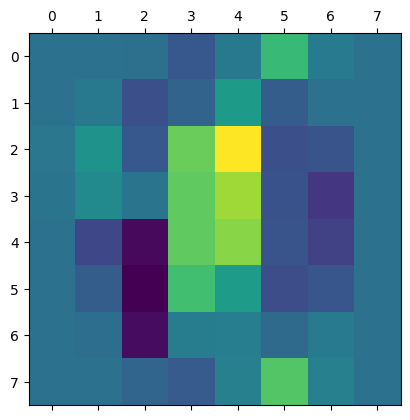

In [69]:
# Implement perceptron and test the shape of the weight you get.
# print(len(weights[0]))
# print("Weights shape:", weights.shape)
print_heatmap(weights[1:]) #What does this represent for the classification problem?
# weights[1:] represents the weight vector of the perceptron model, 
# indicating the contribution of each input feature to the classification decision. 
# By removing weights[0], which is the bias term, you can visualize weights[1:] to intuitively see how the model processes different features in the data, 
# such as which pixels play a more significant role in classification.